In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.linear_model import LogisticRegression as lr
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve ,auc,classification_report as crt,confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [139]:
dat=pd.read_csv(r'A:\datasets\Parkinsons.txt')

In [162]:
data=dat.drop('name',axis=1)
targ=dat.status
data#.describe().T

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [163]:
data.to_csv(r'A:\datasets\parkinsons.csv')

In [164]:
data.size

4485

In [165]:
data.shape

(195, 23)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

### There are 195 records and 24 attributes thereby giving 4680 unique data points. In which the name is a nominal data, status a boolean data and the other 22 atrributes are continuous data(floats). The status attribute would be the target variable, telling whether the patient has parkinsons or not. The continuous data have a huge range of values, hence it will have to get scaled. Finding the inter relationship of the variables and how much of an influence do they have on each other is gonna be tricky. The number of records being less its gonna affect the diffference in variance between the training and testing data sets(cross validation can be opted here)

In [167]:
data.columns=['Fo','Fhi','Flo','Jitter%','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE'
]

In [168]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
Fo,119.992000,122.400000,116.682000,116.676000,116.014000,120.552000,120.267000,107.332000,95.730000,95.056000,...,116.286000,116.556000,116.342000,114.563000,201.774000,174.188000,209.516000,174.688000,198.764000,214.289000
Fhi,157.302000,148.650000,131.111000,137.871000,141.781000,131.162000,137.244000,113.840000,132.068000,120.103000,...,177.291000,592.030000,581.289000,119.167000,262.707000,230.978000,253.017000,240.005000,396.961000,260.277000
Flo,74.997000,113.819000,111.555000,111.366000,110.655000,113.787000,114.820000,104.315000,91.754000,91.226000,...,96.983000,86.228000,94.246000,86.647000,78.228000,94.261000,89.488000,74.287000,74.904000,77.973000
Jitter%,0.007840,0.009680,0.010500,0.009970,0.012840,0.009680,0.003330,0.002900,0.005510,0.005320,...,0.003140,0.004960,0.002670,0.003270,0.006940,0.004590,0.005640,0.013600,0.007400,0.005670
JitterAbs,0.000070,0.000080,0.000090,0.000090,0.000110,0.000080,0.000030,0.000030,0.000060,0.000060,...,0.000030,0.000040,0.000020,0.000030,0.000030,0.000030,0.000030,0.000080,0.000040,0.000030
RAP,0.003700,0.004650,0.005440,0.005020,0.006550,0.004630,0.001550,0.001440,0.002930,0.002680,...,0.001340,0.002540,0.001150,0.001460,0.004120,0.002630,0.003310,0.006240,0.003700,0.002950
PPQ,0.005540,0.006960,0.007810,0.006980,0.009080,0.007500,0.002020,0.001820,0.003320,0.003320,...,0.001920,0.002630,0.001480,0.001840,0.003960,0.002590,0.002920,0.005640,0.003900,0.003170
JitterDDP,0.011090,0.013940,0.016330,0.015050,0.019660,0.013880,0.004660,0.004310,0.008800,0.008030,...,0.004030,0.007620,0.003450,0.004390,0.012350,0.007900,0.009940,0.018730,0.011090,0.008850
Shimmer,0.043740,0.061340,0.052330,0.054920,0.064250,0.047010,0.016080,0.015670,0.020930,0.028380,...,0.015640,0.016600,0.013000,0.011850,0.025740,0.040870,0.027510,0.023080,0.022960,0.018840
ShimmerdB,0.426000,0.626000,0.482000,0.517000,0.584000,0.456000,0.140000,0.134000,0.191000,0.255000,...,0.136000,0.154000,0.117000,0.106000,0.255000,0.405000,0.263000,0.256000,0.241000,0.190000


## Univariate & Bivariate Analysis

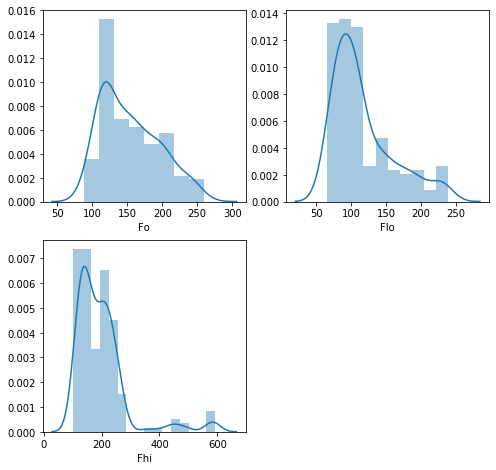

In [169]:
plt.figure(figsize=(8,12))

plt.subplot(3,2,1)
sns.distplot(data.Fo);

plt.subplot(3,2,2)
sns.distplot(data.Flo);

plt.subplot(3,2,3)
sns.distplot(data.Fhi);


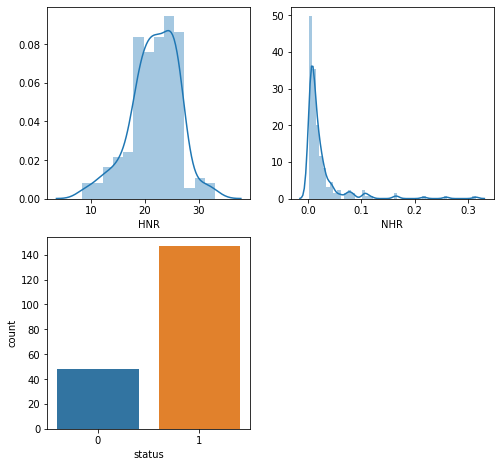

In [170]:
plt.figure(figsize=(8,12))

plt.subplot(3,2,1)
sns.distplot(data.HNR);

plt.subplot(3,2,2)
sns.distplot(data.NHR);

plt.subplot(3,2,3)
sns.countplot(data.status);

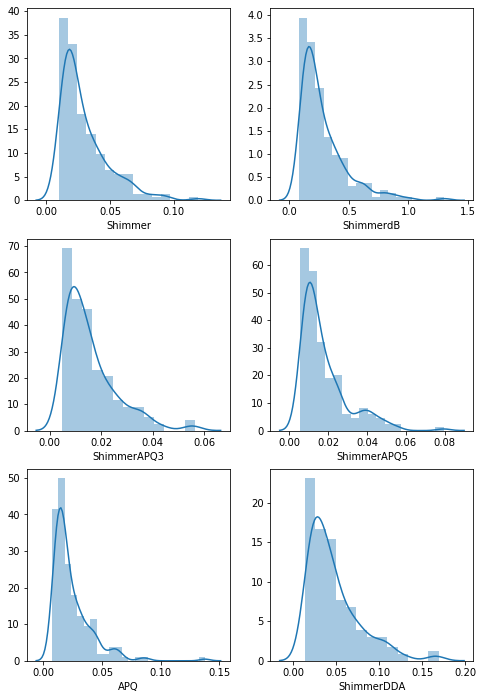

In [171]:
plt.figure(figsize=(8,12))

plt.subplot(3,2,1)
sns.distplot(data.Shimmer);

plt.subplot(3,2,2)
sns.distplot(data.ShimmerdB);

plt.subplot(3,2,3)
sns.distplot(data.ShimmerAPQ3); 

plt.subplot(3,2,4)
sns.distplot(data.ShimmerAPQ5);


plt.subplot(3,2,5)
sns.distplot(data.APQ);

plt.subplot(3,2,6)
sns.distplot(data.ShimmerDDA);

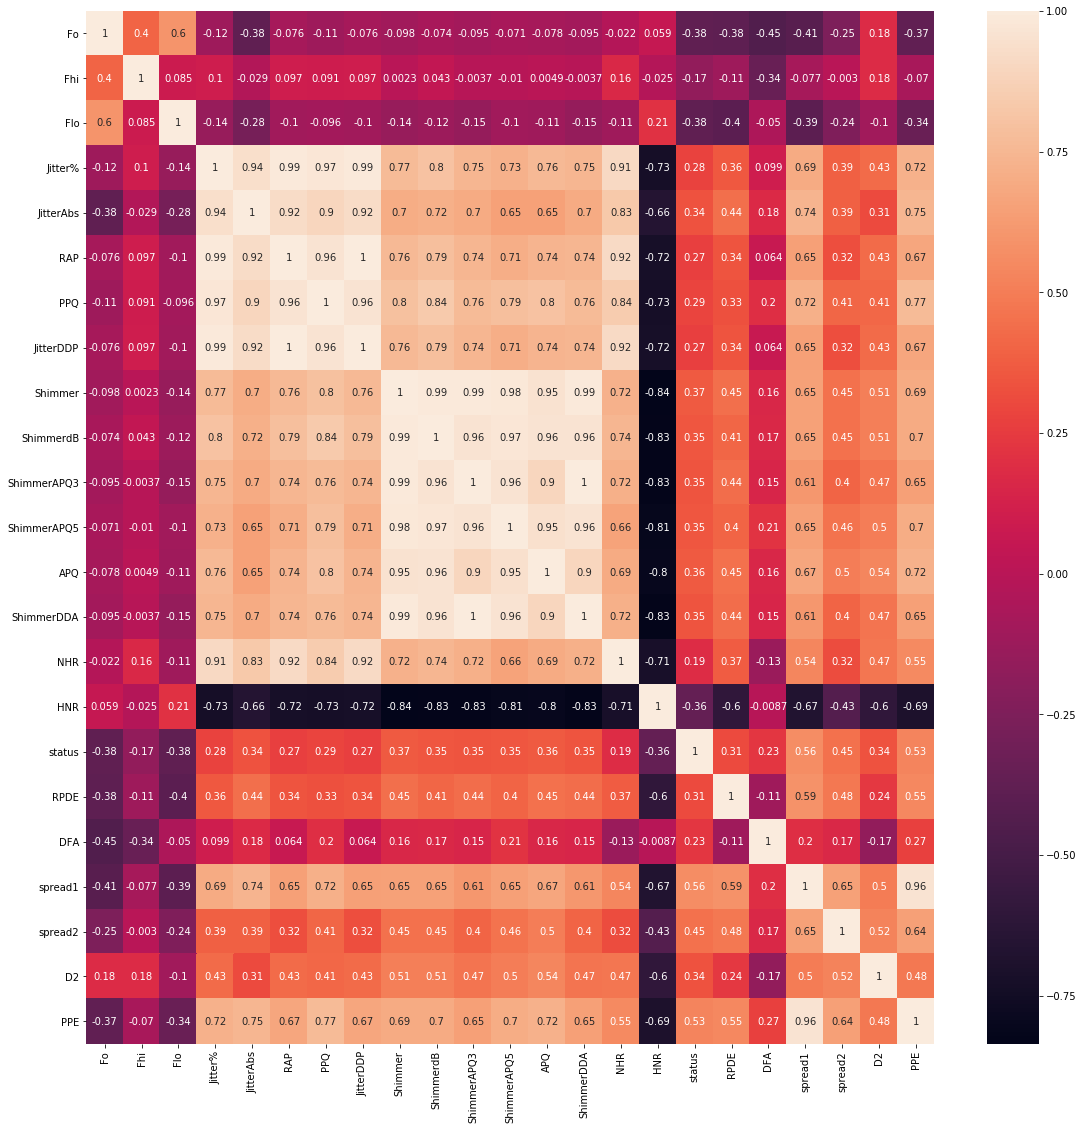

In [172]:
plt.figure(figsize=(19,19))
sns.heatmap(data.corr(),annot=True)

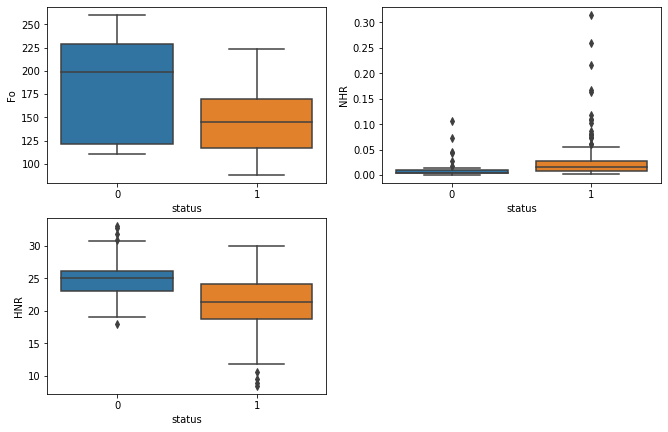

In [173]:
plt.figure(figsize=(11,11))

plt.subplot(3,2,1)
#sns.scatterplot(data.,data.RPDE,hue=data.status)
sns.boxplot(x='status',y='Fo',data=data)


plt.subplot(3,2,2)
#sns.scatterplot(data.Fo,data.DFA,hue=data.status)
sns.boxplot(x='status',y='NHR',data=data)

plt.subplot(3,2,3)
#sns.scatterplot(data.Fo,data.spread1,hue=data.status)
sns.boxplot(x='status',y='HNR',data=data)


### From the heat map and the boxplots, Fo is negatively correlated with the status, patients with lower average frequency tend to have symptoms of Parkinsons, there are cases where the frequency could be as high as 225and an average of 150. NHR is positively correlated to the status, there are marginal differences between cases with and without Parkinsons, with parkinsons cases slightly having higher NHR values on an average being above 0.02. The HNR is negatively correlated to the status of the patient, the HNR values for the Parkinsons positive cases seem to be lower to the values of  negative cases, the average value being 20 for positive cases and exceptional cases going as low as 10.

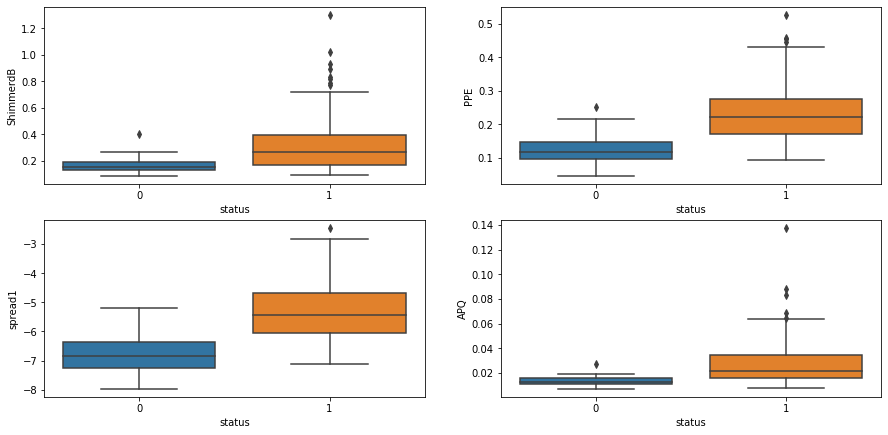

In [174]:

plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.boxplot(x='status',y='ShimmerdB',data=data)

plt.subplot(4,2,2)
sns.boxplot(x='status',y='PPE',data=data)


plt.subplot(4,2,3)
sns.boxplot(x='status',y='spread1',data=data)

plt.subplot(4,2,4)
sns.boxplot(x='status',y='APQ',data=data)


### Shimmerdb and APQ are positively correlated to the status of the cases, for both the positive cases have higher average values of 0.2 and are positively skewed although APQ has a lower count upto the 2nd quartile.   PPE is highly positively correlated to the status with positive cases having higher average values of above 0.2  and is slightly positively skewed  with few exceptional cases going as high as 0.5. Spread1 is also highly positively correlated to the status with positive cases having higher average values of -0.5 and is slightly positively skewed  with few exceptional cases going as high as -0.3.

## Splitting the dataset

In [178]:
data=data.drop('status',axis=1)

In [179]:
x_train,x_test,y_train,y_test=train_test_split(data,targ,test_size=0.3,random_state=1)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((136, 22), (59, 22), (136,), (59,))

# Scaling the data

In [181]:
#data.isna().apply(pd.value_counts).T
data.isna().apply(pd.value_counts).T

,False
Fo,195
Fhi,195
Flo,195
Jitter%,195
JitterAbs,195
RAP,195
PPQ,195
JitterDDP,195
Shimmer,195
ShimmerdB,195


### There are no null values in the dataset

In [183]:
scaled=StandardScaler().fit_transform(data)

In [184]:
scaled

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [185]:
sata=pd.DataFrame(data=scaled,columns=['Fo','Fhi','Flo','Jitter%','JitterAbs','RAP','PPQ','JitterDDP','Shimmer','ShimmerdB','ShimmerAPQ3','ShimmerAPQ5','APQ','ShimmerDDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'
])

In [187]:
sata.describe().T


,count,mean,std,min,25%,50%,75%,max
Fo,195.0,3.529940e-17,1.002574,-1.596162,-0.887918,-0.131738,0.691321,2.564598
Fhi,195.0,-2.237526e-16,1.002574,-1.040581,-0.682059,-0.233144,0.296971,4.327631
Flo,195.0,1.309494e-16,1.002574,-1.171366,-0.737938,-0.276658,0.545820,2.829908
Jitter%,195.0,-2.127927e-17,1.002574,-0.938949,-0.570852,-0.264794,0.236686,5.570985
JitterAbs,195.0,2.562053e-18,1.002574,-1.064103,-0.689814,-0.401899,0.461845,6.220139
RAP,195.0,-1.380662e-16,1.002574,-0.887254,-0.556191,-0.272422,0.178568,6.125892
PPQ,195.0,9.351494e-17,1.002574,-0.918044,-0.576461,-0.274850,0.184833,5.862742
JitterDDP,195.0,1.015569e-16,1.002574,-0.887333,-0.555707,-0.273628,0.178487,6.126923
Shimmer,195.0,2.818258e-16,1.002574,-1.072340,-0.702029,-0.358302,0.434690,4.751617
ShimmerdB,195.0,-1.374969e-16,1.002574,-1.014787,-0.688103,-0.315116,0.348543,5.246243


###  The data has been scaled using Standard Scalar thereby setting all the values with a unit variance

# Decision Tree

In [189]:
dt=tree.DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [191]:
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))


1.0
0.847457627118644


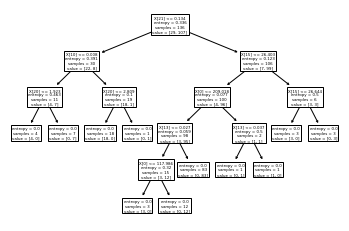

In [192]:
tree.plot_tree(dt);

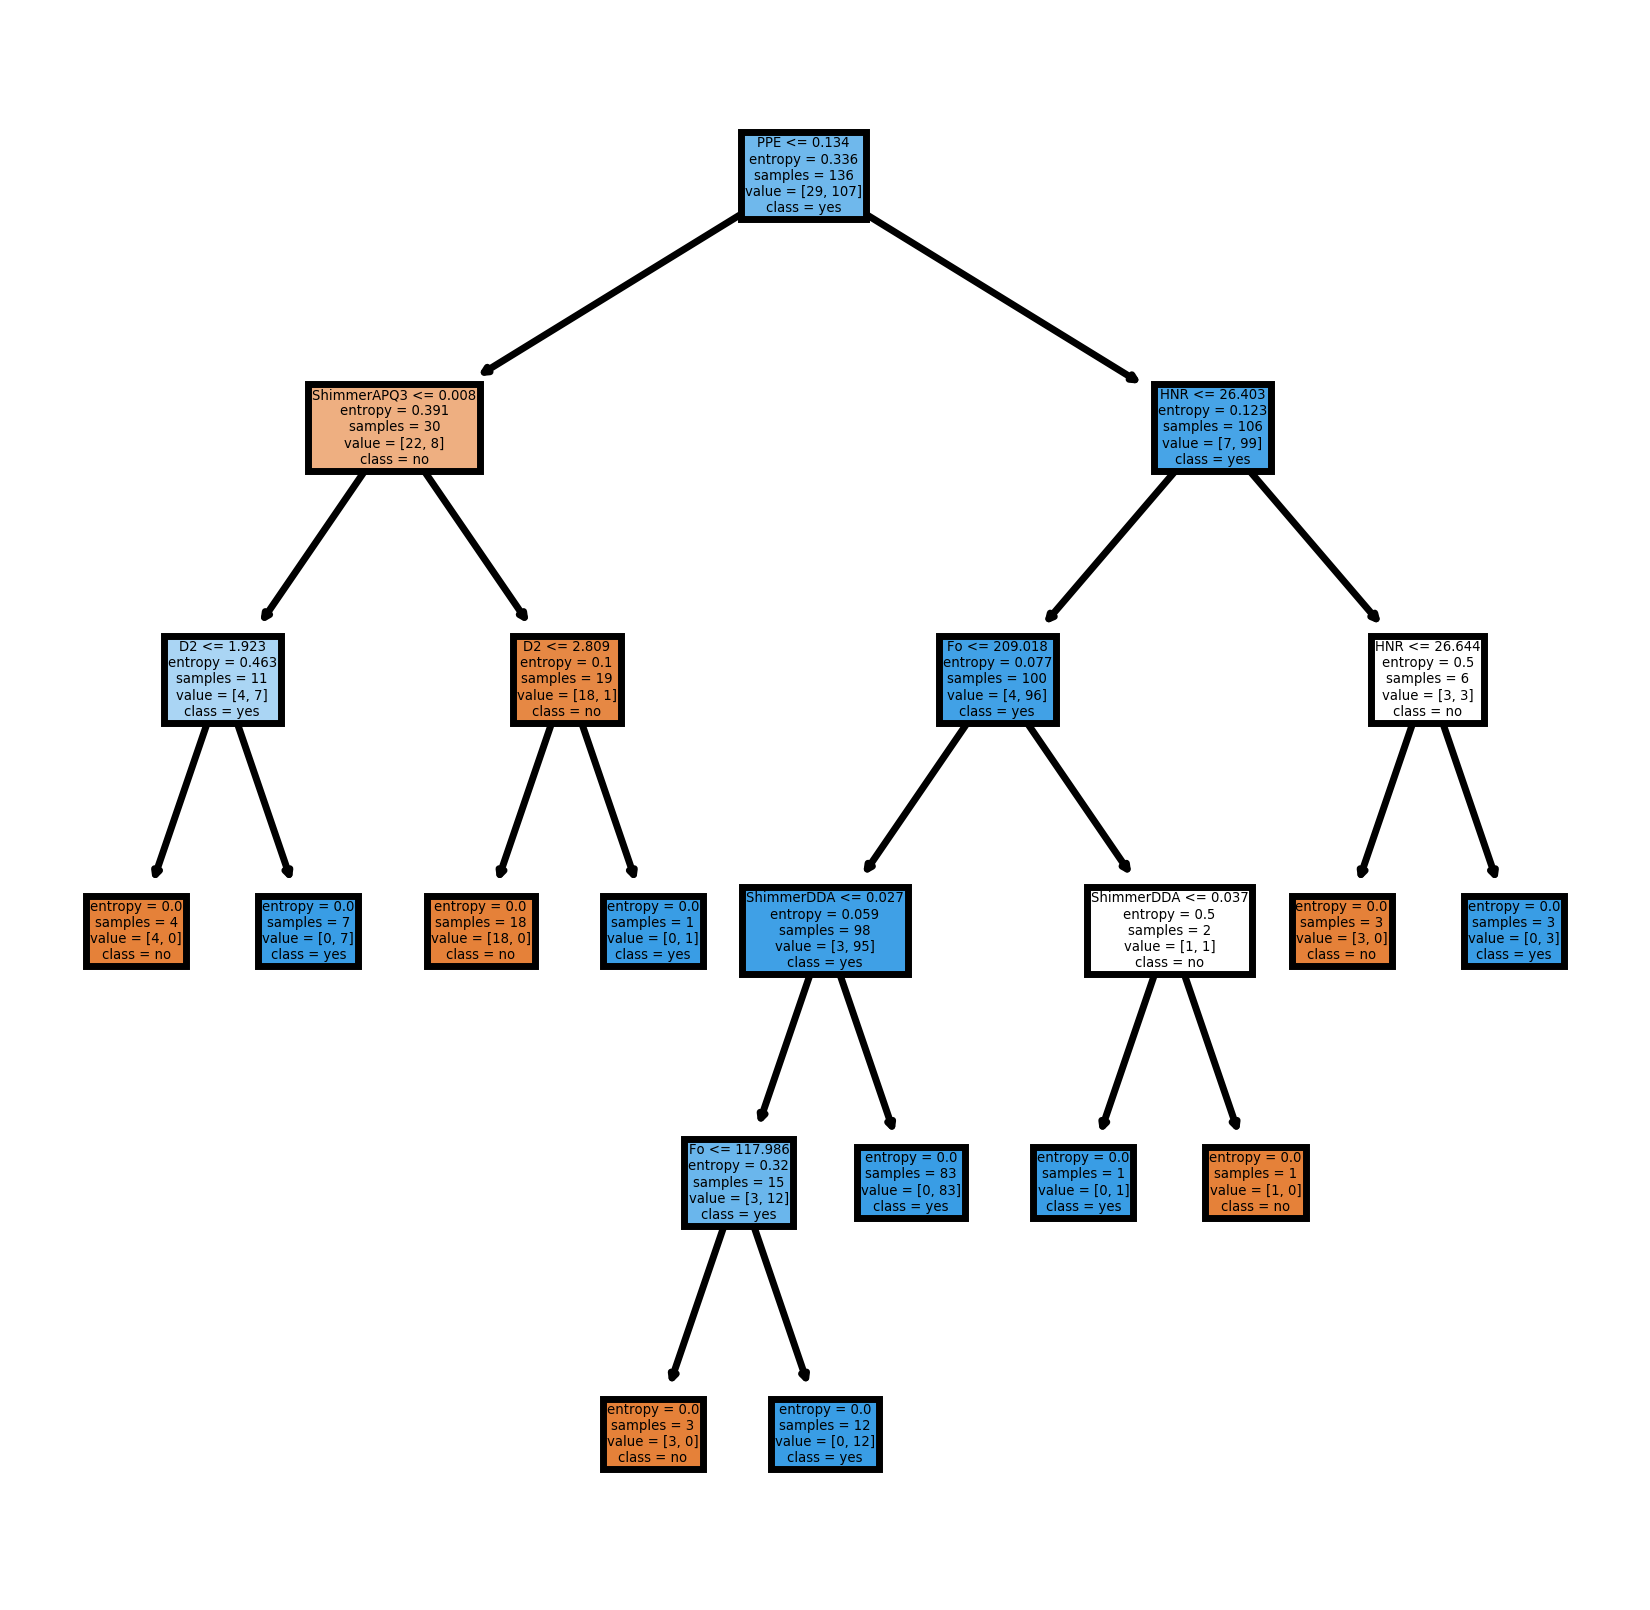

In [195]:
fn=list(x_train)
cn=['no','yes']
fig, axes= plt.subplots(nrows=1,ncols=1, figsize=(4,4),dpi=500)
tree.plot_tree(dt,feature_names=fn,class_names=cn,filled=True)

fig.savefig('tree.png')

### Trying to reduce the overfit of data

In [204]:
dtr=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
print(dtr.score(x_test,y_test))


0.9705882352941176
0.7796610169491526


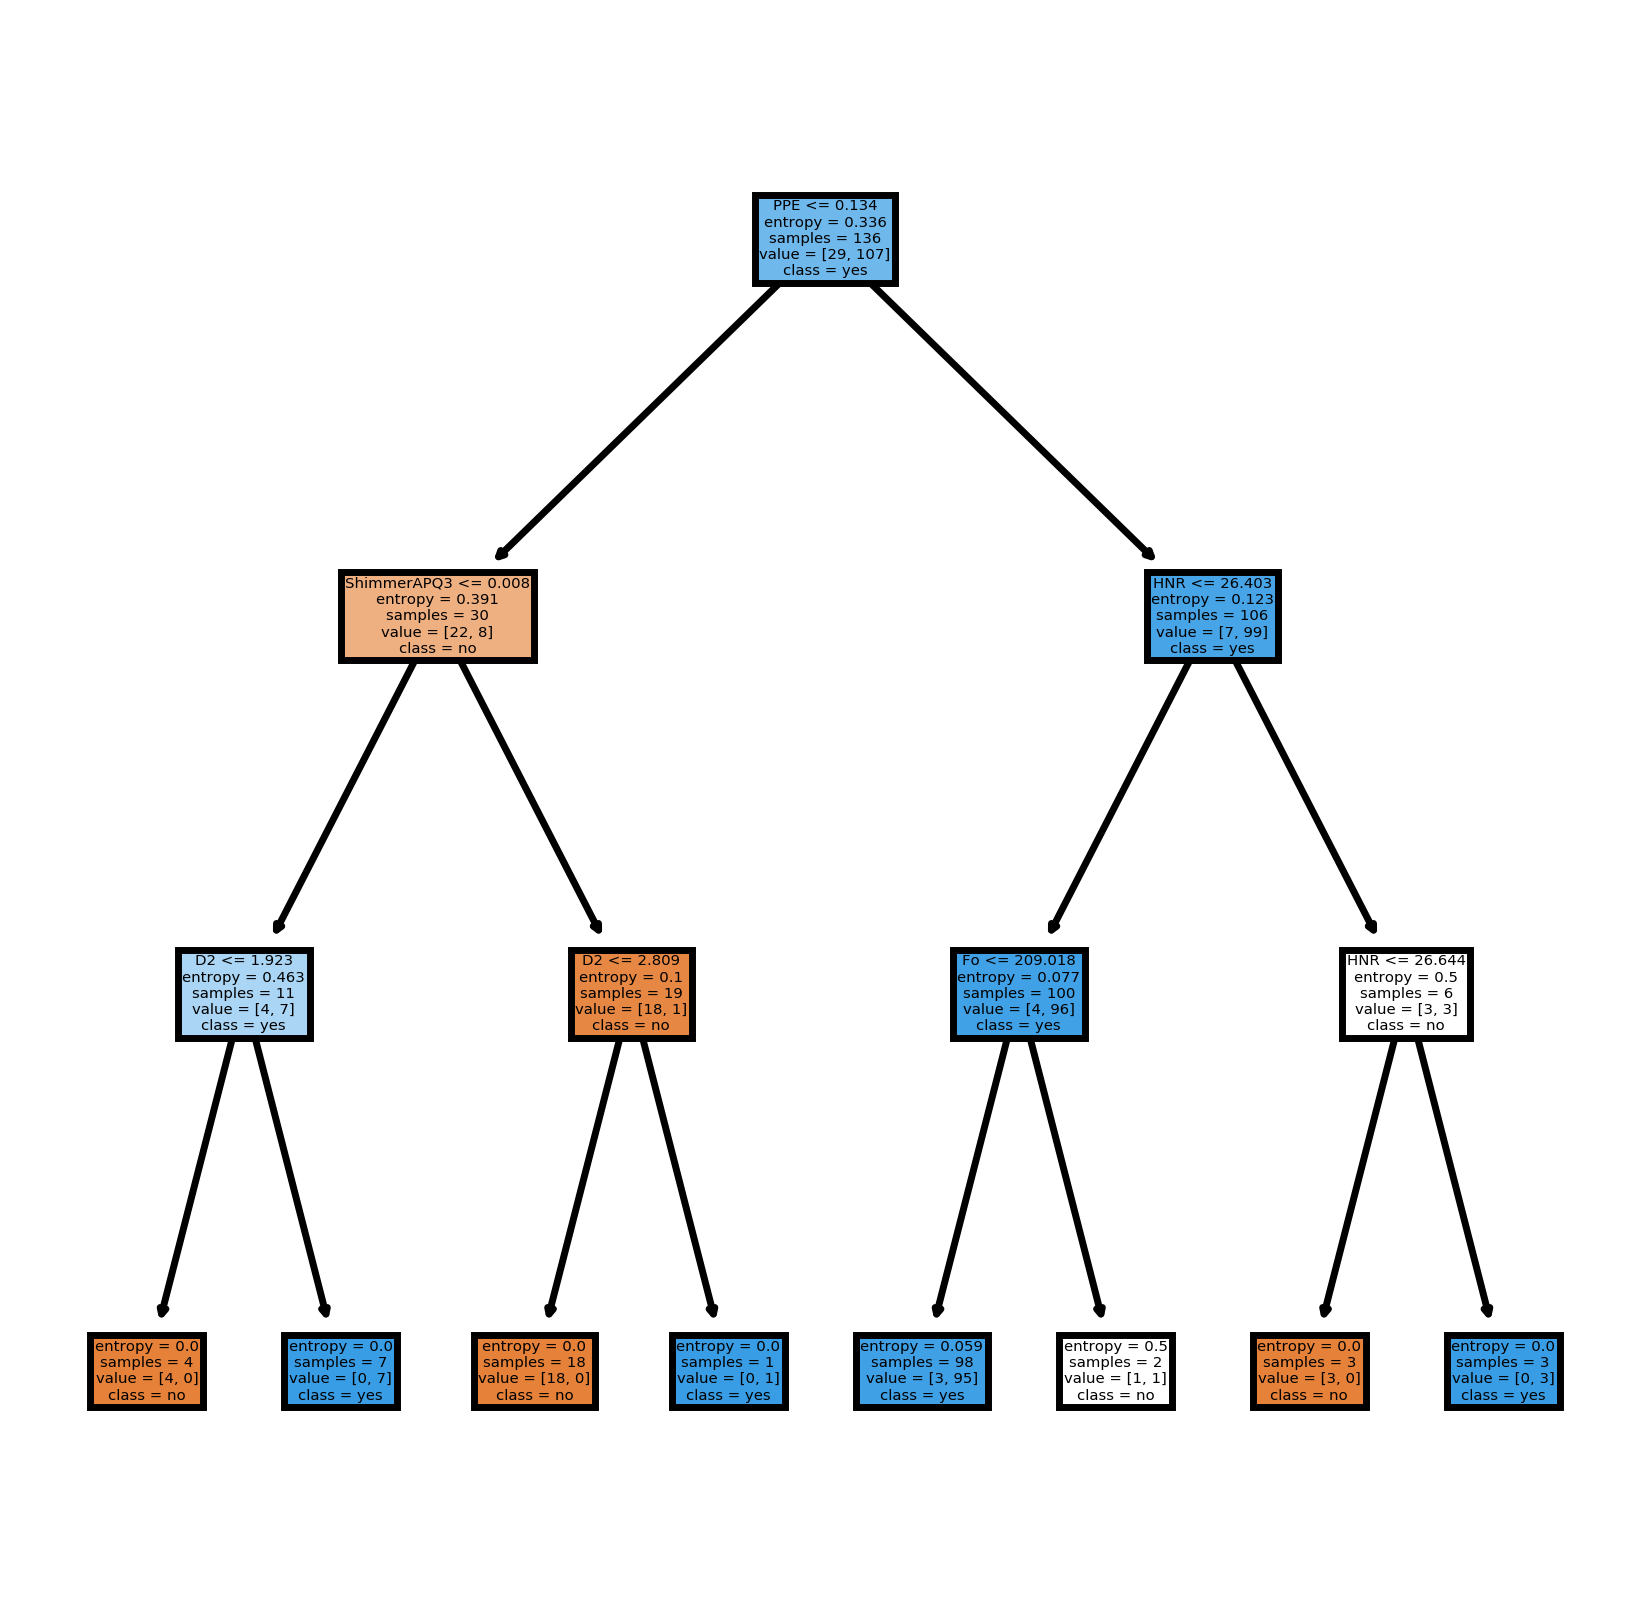

In [208]:
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(dtr,feature_names=fn,class_names=cn,filled=True);


In [214]:
print(pd.DataFrame(dtr.feature_importances_,columns=['important'],index=x_train.columns))

             important
Fo            0.022250
Fhi           0.000000
Flo           0.000000
Jitter%       0.000000
JitterAbs     0.000000
RAP           0.000000
PPQ           0.000000
JitterDDP     0.000000
Shimmer       0.000000
ShimmerdB     0.000000
ShimmerAPQ3   0.122313
ShimmerAPQ5   0.000000
APQ           0.000000
ShimmerDDA    0.000000
NHR           0.000000
HNR           0.139001
RPDE          0.000000
DFA           0.000000
spread1       0.000000
spread2       0.000000
D2            0.179968
PPE           0.536468


              precision    recall  f1-score   support

           0       0.71      0.53      0.61        19
           1       0.80      0.90      0.85        40

    accuracy                           0.78        59
   macro avg       0.76      0.71      0.73        59
weighted avg       0.77      0.78      0.77        59



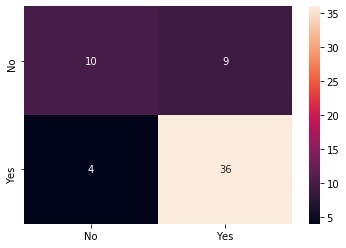

In [317]:

y_pred=dtr.predict(x_test)
print(crt(y_test,y_pred))
dcm=metrics.confusion_matrix(y_test,y_pred)
dtcm=pd.DataFrame (dcm,index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
sns.heatmap(dtcm,annot=True)


### With the overfitted data the accuracy was about 85% after controlling the fit, the accuracy has dropped to 78%. The important features in the data set seem to be PPE with 53.6% D2 with 17.9% and HNR with 13.9% weightage. The recall is 78%.

# Logistic Regression

In [283]:
logr=lr(solver="liblinear")
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [290]:
logr_prob=logr.predict_proba(x_test)
fpr2,tpr2, thresholds2=roc_curve(y_test,logr_prob[:,1])
lr_roc=auc(fpr2,tpr2)
print("Area under the curve %f" %lr_roc)

Area under the curve 0.848684


              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.81      0.95      0.87        40

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59



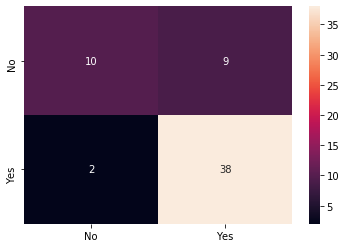

In [291]:
logr_pred=logr.predict(x_test)
print(crt(y_test,logr_pred))
logr_cm=cm(y_test,logr_pred)
logr_mat=pd.DataFrame(logr_cm,columns=[i for i in ['No','Yes'] ], index =[i for i in ['No','Yes']])
sns.heatmap(logr_mat,annot=True)

## With the data the accuracy was about 81% . The Area under the Curve is 84%. The recall is 81%

# Naive Bayes

In [276]:
bayes=gnb()
bayes.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [292]:
bayes_prob=bayes.predict_proba(x_test)
fpr,tpr,thresholds=roc_curve(y_test,bayes_prob[:,1])
nb_roc=auc(fpr,tpr)
print("area under the curve %f" %nb_roc)

area under the curve 0.820395


              precision    recall  f1-score   support

           0       0.53      0.95      0.68        19
           1       0.96      0.60      0.74        40

    accuracy                           0.71        59
   macro avg       0.74      0.77      0.71        59
weighted avg       0.82      0.71      0.72        59



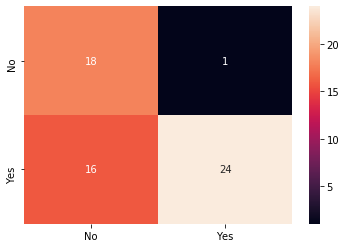

In [294]:
bayes_pred=bayes.predict(x_test)
print(crt(y_test,bayes_pred))
bayes_mat=cm(y_test,bayes_pred)
bayes_matrix=pd.DataFrame(bayes_mat,index=[i for i in['No','Yes']],columns=[i for i in ['No','Yes']])
sns.heatmap(bayes_matrix,annot=True)

## With the data the accuracy was about 71% . The Area under the Curve is 82%. The recall is 71%

# Meta Classifiers


## Random Forest 

In [296]:
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)


C:\Users\Ajay\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.86      0.93      0.89        40

    accuracy                           0.85        59
   macro avg       0.84      0.80      0.82        59
weighted avg       0.85      0.85      0.84        59



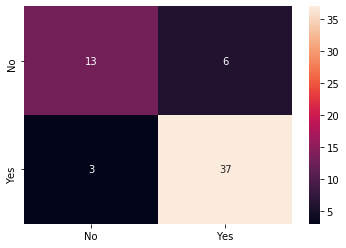

In [302]:
rf_pred=rfc.predict(x_test)
print(crt(y_test,rf_pred) )
rf_mat=cm(y_test,rf_pred)
rf_matr=pd.DataFrame(rf_mat,index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
sns.heatmap(rf_matr,annot=True);

## With the data the accuracy was about 85% . The recall is 85%.

# AdaBoost 

In [314]:
abc= AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada=abc.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



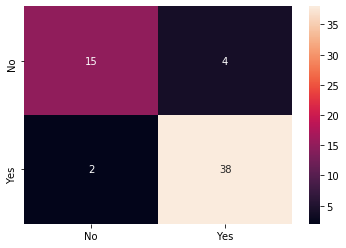

In [316]:
y_pred=ada.predict(x_test)
print(crt(y_test,y_pred))
ada_mat=cm(y_test,y_pred)
ada_matr=pd.DataFrame(ada_mat,index=[i for i in ['No','Yes']],columns=[i for i in ['No','Yes']])
sns.heatmap(ada_matr,annot=True)

## With the data the accuracy was about 90% . The Area under the Curve is 84%. The recall is 90%

# Conclusion

### As per my analysis, Ada Boost has the highest recall value of 90%, with a good accuracy of 90%. The disagreement between the predicted data being false and the the observed data being true (a True Negative) is low, thereby with a higher sucees rate of identifying patients with Parkinsons